# Importando bibliotecas e Verificando o arquivo

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
# Verificando informações de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


A coluna "Tenure" possui dados faltantes.

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Removendo Duplicatas
df.drop_duplicates(inplace = True)

## Verificando mais a fundo a coluna Tenure

In [6]:
# Verificando quais os valores da coluna
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
# Isolando os valores NAN da coluna para procurar uma padrão
df.loc[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [8]:
df['Tenure'].isnull().sum()/len(df['Tenure'])

0.0909

Os dados faltantes são 09% dos dados de todo arquivo. E não encontrei nenhum padrão aparente entre a coluna Tenure e os demais dados. Vou retirar os dados faltantes em um primeiro momento.

In [9]:
df_limpo = df.dropna()
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [10]:
df_limpo

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


Valores ausentes removidos com sucesso!!

## Definindo os conjuntos de teste

In [11]:
# retirando a coluna Surname que não será utilizada no treinamento, antes de categorizar as variáveis
df_limpo = df_limpo.drop(['Surname'], axis =1)

# Utilizando a codificação OHE para variáveis categóricas, assim o modelo pode prever todas a variáveis.
df_limpo = pd.get_dummies(df_limpo, drop_first=True)

In [12]:
# As características são todas as informações sobre os clientes que não possuem quaisquer relações com sua identificação:
# (CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember e EstimatedSalary)
features = df_limpo.drop(['RowNumber', 'CustomerId','Exited'], axis=1)

# O resultado que queremos é se o cliente saiu (1) ou permaneceu (0)
target = df_limpo['Exited']

In [13]:
# Separando os dados para treino e teste, colocando 80% em teste e o resto em treinamento
features_train, features_test, target_train, target_test = train_test_split(
    features,target , test_size=0.2, random_state=12345)

In [14]:
# Separando os dados para treino e validação, colocando 25% em teste e o resto em validação
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test , test_size=0.75, random_state=12345)

In [15]:
len(features_train)

7272

In [16]:
len(features_test)

454

In [17]:
len(features_valid)

1365

In [18]:
# ajustando a escalabilidade das características, para não haver uma distinção de importância nas características do modelo.
numeric = ['CreditScore', 'Age' , 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] # são as características que queremos deixar com a mesma importancia

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

/tmp/ipykernel_59/2247128444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## Regressão Logística - sem levar em conta o desequilíbrio de classes

In [19]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train,target_train)

score_train = model.score(features_train, target_train)# calcule a acurácia no conjunto de treinamento
score_test = model.score(features_test, target_test)# calcule a acurácia no conjunto de treinamento
score_valid = model.score(features_valid, target_valid) # calcule a acurácia no conjunto de validação

print("Acurácia do modelo de regressão logística no conjunto de treinamento:", score_train)
print("Acurácia do modelo de regressão logística no conjunto de teste:", score_test)
print("Acurácia do modelo de regressão logística no conjunto de validação:", score_valid)

Acurácia do modelo de regressão logística no conjunto de treinamento: 0.8081683168316832
Acurácia do modelo de regressão logística no conjunto de teste: 0.21585903083700442
Acurácia do modelo de regressão logística no conjunto de validação: 0.8205128205128205


In [20]:
# Verificando a matriz de confusão para os dados
predicted_valid = model.predict(features_valid)
confusion_matrix(target_valid, predicted_valid)

array([[1064,   30],
       [ 215,   56]])

In [21]:
# Sensibilidade
recall_score(target_valid, predicted_valid)


0.2066420664206642

In [22]:
# Precisão
precision_score(target_valid,predicted_valid)

0.6511627906976745

In [23]:
# F1
f1_score(target_valid, predicted_valid)

0.3137254901960785

Por mais que a precisão do modelo tenha um valor relativamente alto, ele deixa um pouco a desejar na sensibilidade e consequentemente no valor F1. Isso indica que percisamos ajustar o equilíbrio entre as métricas.

## Trabalhando o Equilíbrio de Classes

In [24]:
# Adicionando o argumento class_weight no modelo
model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced')
model.fit(features_train,target_train)

score_train = model.score(features_train, target_train)# calcule a acurácia no conjunto de treinamento
score_test = model.score(features_test, target_test)# calcule a acurácia no conjunto de treinamento
score_valid = model.score(features_valid, target_valid) # calcule a acurácia no conjunto de validação

predicted_valid = model.predict(features_valid)

In [25]:
# Sensibilidade
recall_score(target_valid, predicted_valid)

0.7453874538745388

In [26]:
# Precisão
precision_score(target_valid,predicted_valid)

0.4122448979591837

In [27]:
# F1
f1_score(target_valid, predicted_valid)

0.530880420499343

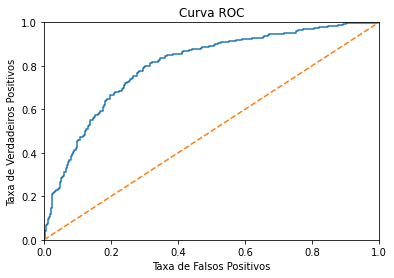

In [28]:
# Traçando a curva ROC do modelo
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

In [29]:
#Auc-roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

0.8025661609449732

Melhoramos nossos indicadores ao balancear as classes. Agora vamos utlizar uma outra abordagem acrescentando a Subamostragem.

### Subamostragem

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [31]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(features_valid)

f1_score(target_valid, predicted_valid)

0.524547803617571

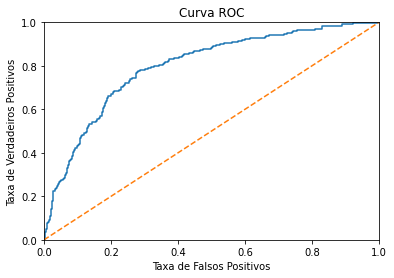

In [32]:
# Traçando a curva ROC do modelo
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

In [33]:
#Auc-roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

0.7968287269709992

Utilizando a subamostragem para corrigir o equilíbrio não foi uma boa escolha visto que o valor F1 diminuiu. Por isso na próxima abordagem vou utliziar a Superamostragem.

### Superamostragem

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [35]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

f1_score(target_valid, predicted_valid)

0.530880420499343

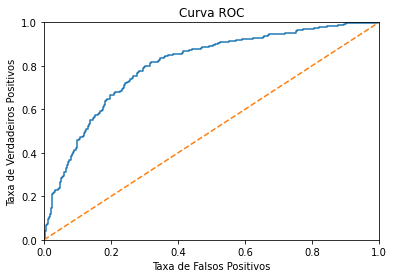

In [36]:
# Traçando a curva ROC do modelo
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

In [37]:
#Auc-roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

0.8026066366696574

A superamostragem também não foi muito eficaz na melhora do modelo. O valor F1 continua o mesmo. Mas vamos continuar com ele. E o resultado é melhor que o modelo aleatório, mas não é perfeito, pois o AUC-ROC ainda está baixo de 1.

Treinamos o nosso modelo onde o mesmo apresentou bons resultados das métricas que utilizamos para verficiar sua qualidade, como valor F1, e AUC-ROC. O modelo não apresenta o valor máximo em ambas as métricas, mas seu resultado é aceitável para poder colocar ele em uso. Também é possível perceber pela Curva ROC, ele apresenta resultados melhores que o modelo aleatório.